# Introduction to Convulational Neural Networks

In [1]:
# Get the data
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-10-18 01:37:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.207, 142.250.99.207, 142.250.107.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   227MB/s    in 0.5s    

2023-10-18 01:37:03 (227 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

## Inspect the data

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [5]:
import os
# Walk thru pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are len{ len(dirnames)} directories and {len(filenames)} imaes in /{dirpath}")

There are len2 directories and 0 imaes in /pizza_steak
There are len2 directories and 0 imaes in /pizza_steak/train
There are len0 directories and 750 imaes in /pizza_steak/train/pizza
There are len0 directories and 750 imaes in /pizza_steak/train/steak
There are len2 directories and 0 imaes in /pizza_steak/test
There are len0 directories and 250 imaes in /pizza_steak/test/pizza
There are len0 directories and 250 imaes in /pizza_steak/test/steak


In [6]:
num_steak_images = len(os.listdir("pizza_steak/train/steak"))
num_steak_images

750

To visualize our images, first let get the class names programmatically

In [7]:
# Get the class names programatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
print(data_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

pizza_steak/train


array(['pizza', 'steak'], dtype='<U5')

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir, target_class):
  # Set up the target directory
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image with matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])

  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

Image shape: (384, 512, 3)


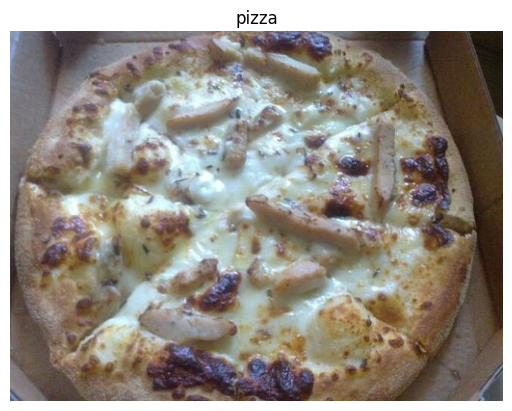

In [9]:
img = view_random_image("pizza_steak/train/", "pizza")


In [10]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[136, 148, 172],
        [133, 148, 171],
        [133, 148, 171],
        ...,
        [ 39,  35,  23],
        [ 36,  32,  20],
        [ 31,  27,  15]],

       [[142, 154, 178],
        [137, 152, 175],
        [134, 149, 172],
        ...,
        [ 38,  34,  22],
        [ 38,  34,  22],
        [ 36,  32,  20]],

       [[141, 153, 179],
        [137, 151, 177],
        [134, 148, 174],
        ...,
        [ 39,  33,  19],
        [ 40,  34,  20],
        [ 41,  35,  21]],

       ...,

       [[ 85,  97, 111],
        [ 92, 105, 122],
        [106, 121, 142],
        ...,
        [ 83,  87,  90],
        [ 87,  92,  95],
        [ 92,  97, 100]],

       [[ 79,  93, 104],
        [ 80,  96, 109],
        [ 86, 103, 123],
        ...,
        [ 78,  82,  85],
        [ 83,  87,  90],
        [ 88,  92,  95]],

       [[ 86, 100, 109],
        [ 84, 100, 113],
        [ 81,  98, 116],
        ...,
        [ 81,  85,  8

In [11]:
# View image shape
img.shape # returns width, height, and color channels

(384, 512, 3)

In [12]:
# Get all pixel values between 0 and 1. However, we cannot do this for every image
img/255.

array([[[0.53333333, 0.58039216, 0.6745098 ],
        [0.52156863, 0.58039216, 0.67058824],
        [0.52156863, 0.58039216, 0.67058824],
        ...,
        [0.15294118, 0.1372549 , 0.09019608],
        [0.14117647, 0.1254902 , 0.07843137],
        [0.12156863, 0.10588235, 0.05882353]],

       [[0.55686275, 0.60392157, 0.69803922],
        [0.5372549 , 0.59607843, 0.68627451],
        [0.5254902 , 0.58431373, 0.6745098 ],
        ...,
        [0.14901961, 0.13333333, 0.08627451],
        [0.14901961, 0.13333333, 0.08627451],
        [0.14117647, 0.1254902 , 0.07843137]],

       [[0.55294118, 0.6       , 0.70196078],
        [0.5372549 , 0.59215686, 0.69411765],
        [0.5254902 , 0.58039216, 0.68235294],
        ...,
        [0.15294118, 0.12941176, 0.0745098 ],
        [0.15686275, 0.13333333, 0.07843137],
        [0.16078431, 0.1372549 , 0.08235294]],

       ...,

       [[0.33333333, 0.38039216, 0.43529412],
        [0.36078431, 0.41176471, 0.47843137],
        [0.41568627, 0

## An end to end example

Build a convolutional NN to find patterns in our images:
- Load our images
- Preprocess our images
- Build a CNN to find patterns in our images
- COmpile our CNN
- Fit the CNN

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Preprocess data (get all of the pixel values betweem 0 and 1)
train_datagen = ImageDataGenerator(
    rescale=1./255
)

valid_datagen = ImageDataGenerator(rescale=1./255)

# Setu paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)


valid_data = valid_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)

# Build CNN model (same as the tiny VGG)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation="relu",
        input_shape=(224,224,3)
    ),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
     tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

# Compile our CNN

model_1.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit model
history_1 = model_1.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 21s 148ms/step - loss: 0.5641 - accuracy: 0.7073 - val_loss: 0.4048 - val_accuracy: 0.8400
Epoch 2/5
47/47 [==============================] - 5s 116ms/step - loss: 0.4108 - accuracy: 0.8107 - val_loss: 0.3940 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 5s 115ms/step - loss: 0.3892 - accuracy: 0.8353 - val_loss: 0.3259 - val_accuracy: 0.8760
Epoch 4/5
47/47 [==============================] - 6s 125ms/step - loss: 0.3125 - accuracy: 0.8613 - val_loss: 0.2890 - val_accuracy: 0.8780
Epoch 5/5
47/47 [==============================] - 7s 148ms/step - loss: 0.2524 - accuracy: 0.8973 - val_loss: 0.3522 - val_accuracy: 0.8340


In [14]:
# Get a model summary()
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 29160)             0

## using the same model as before

Lets use the previous model we build in previous section to see if it works

In [15]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 140ms/step - loss: 0.8687 - accuracy: 0.5067 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 111ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 116ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 107ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 122ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [16]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model_2 performs terribly, lets try to improving it

In [17]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')

])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 108ms/step - loss: 2.9257 - accuracy: 0.6033 - val_loss: 0.7091 - val_accuracy: 0.6180
Epoch 2/5
47/47 [==============================] - 6s 123ms/step - loss: 0.9563 - accuracy: 0.7073 - val_loss: 0.8294 - val_accuracy: 0.6940
Epoch 3/5
47/47 [==============================] - 5s 103ms/step - loss: 1.1218 - accuracy: 0.6693 - val_loss: 0.7658 - val_accuracy: 0.7160
Epoch 4/5
47/47 [==============================] - 6s 123ms/step - loss: 0.6867 - accuracy: 0.7187 - val_loss: 1.1364 - val_accuracy: 0.6000
Epoch 5/5
47/47 [==============================] - 5s 106ms/step - loss: 0.6138 - accuracy: 0.7400 - val_loss: 0.5236 - val_accuracy: 0.7720


In [18]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Binary classification

1 . Become one with the data
2. Preprocess the data
3. Create a model
4. Fit the model
5. Evaluate the model
6. Adjsut different params and improve the model
7. Repeat until satisfied

# 1. Becone one with the data

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


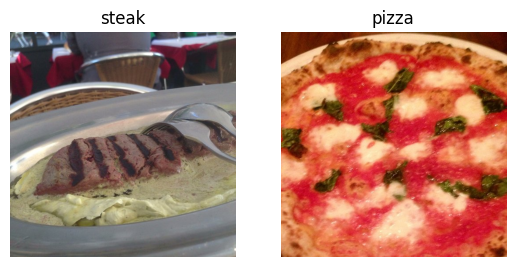

In [19]:
plt.figure()
plt.subplot(1, 2, 1 )
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2 )
steak_img = view_random_image("pizza_steak/train/", "pizza")

## 2. Pre process the data

In [20]:
# Define a directory data paths
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

Our next step is to turn our data into batches

A batch is a small subset of data. Rather than look at all images at one time. a model migh only look at 32 at a time

It does it for:
- 11000 images or more migh not fit into memoy of your processor
- Try to learn the patterns could result in the model not being able to learn very well


In [21]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [22]:
# Load in our image data from directories and turn them into batches

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224), # Target size of images (height, width)
                                               class_mode="binary", # Type of data you are working with
                                               batch_size=32) # Size of a.k.a minibatches to load data into model

test_data =  test_datagen.flow_from_directory(directory=test_dir,
                                              target_size=(224, 224),
                                              class_mode="binary",
                                              batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [23]:
# Get a sample of train data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [24]:
# How many baches are there?
len(train_data)

47

In [25]:
1500/32

46.875

In [26]:
# Get the first two images

images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [27]:
images[7].shape

(224, 224, 3)

In [28]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

## 3. Create a CNN model (start with a baseline)

 A baseline is a realively simple model or existing result that you setup when beggining a machine learning exprimenting, you try to beat the baseline

In [29]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
from tensorflow.random import set_seed

In [30]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

In [31]:
from keras.src.metrics.probabilistic_metrics import binary_crossentropy
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

 Fit the model

In [32]:

# Check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [33]:
history_4 = model_4.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 164ms/step - loss: 0.5950 - accuracy: 0.6827 - val_loss: 0.4367 - val_accuracy: 0.8220
Epoch 2/5
47/47 [==============================] - 5s 115ms/step - loss: 0.3992 - accuracy: 0.8313 - val_loss: 0.3651 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 6s 134ms/step - loss: 0.2400 - accuracy: 0.9133 - val_loss: 0.3976 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 6s 133ms/step - loss: 0.0903 - accuracy: 0.9807 - val_loss: 0.4822 - val_accuracy: 0.8120
Epoch 5/5
47/47 [==============================] - 6s 117ms/step - loss: 0.0599 - accuracy: 0.9873 - val_loss: 0.6532 - val_accuracy: 0.7760


In [34]:
model_1.evaluate(test_data)

16/16 [==============================] - 1s 82ms/step - loss: 0.3522 - accuracy: 0.8340


[0.3521968126296997, 0.8339999914169312]

### 5. Evaluate model

In [35]:
model_4.evaluate(test_data)

16/16 [==============================] - 2s 104ms/step - loss: 0.6532 - accuracy: 0.7760


[0.6531540751457214, 0.7760000228881836]

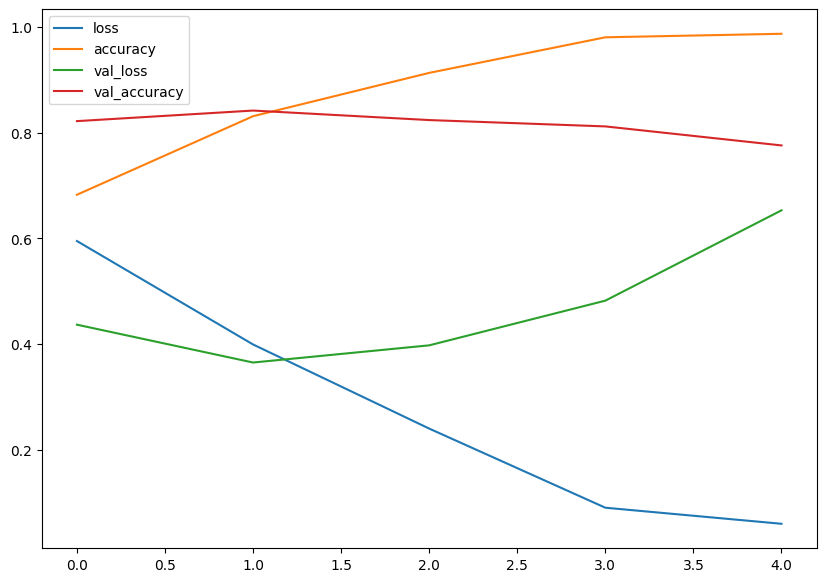

In [36]:

# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [37]:
# PLot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for validating and training metrics
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # plot loss
  plt.plot(epochs, loss, label="Training_loss")
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

  # PLot accuracy
  plt.figure()
  plt.plot(epochs, acc, label="training_accuracy")
  plt.plot(epochs, val_acc, label='val_accuracy')
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


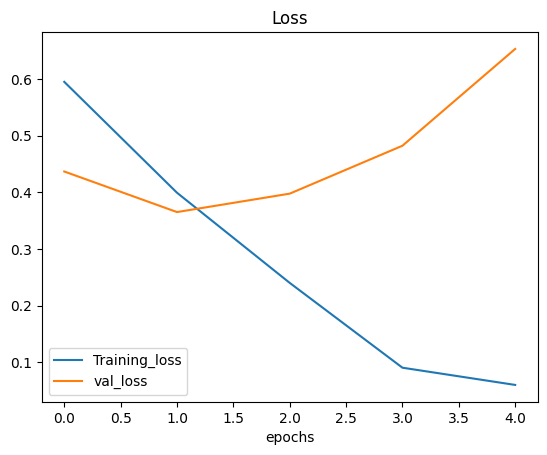

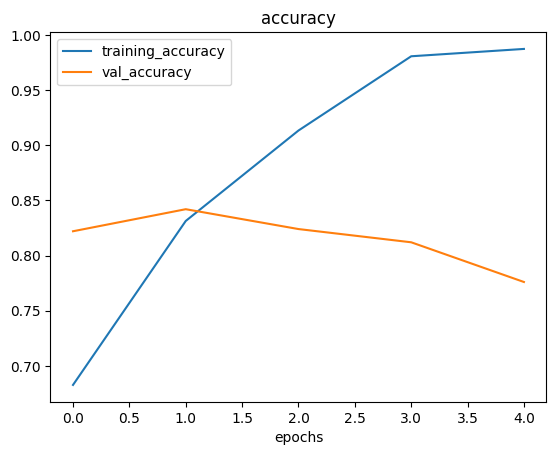

In [38]:
# CHeck out the loss and accuray model_4
plot_loss_curves(history_4)

The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means your model is probably overfitting.

## 6. Adjust model parameters

Fitting a machine learning model comes in 3 steps:
0. Create a basline.

1. Beat the baseline by overfitting a larger model.
2. Reduce overfitting.

So far we've gone through steps 0 and 1.

And there are even a few more things we could try to further overfit our model:

- Increase the number of convolutional layers.
- Increase the number of convolutional filters.
- Add another dense layer to the output of our flattened layer.



In [39]:
# Create the model (this is going to be the new baseline)

model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
   Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
  Flatten(),
    Dense(1, activation="sigmoid")

])

In [40]:
model_5.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=['accuracy']
)

In [41]:
history_5 = model_5.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 132ms/step - loss: 0.6348 - accuracy: 0.6400 - val_loss: 0.4786 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 5s 110ms/step - loss: 0.4753 - accuracy: 0.7760 - val_loss: 0.4012 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 6s 123ms/step - loss: 0.4497 - accuracy: 0.7953 - val_loss: 0.3912 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 6s 131ms/step - loss: 0.3866 - accuracy: 0.8260 - val_loss: 0.3366 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.3727 - accuracy: 0.8380 - val_loss: 0.3181 - val_accuracy: 0.8800


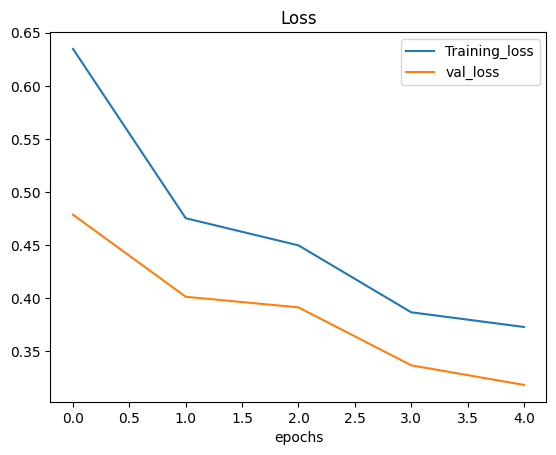

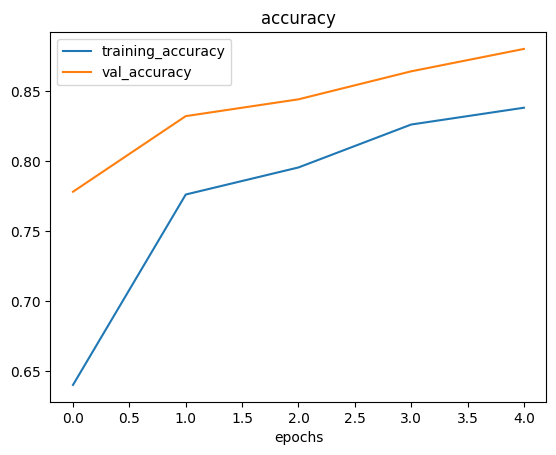

In [42]:
# CHeck out the loss and accuray model_5
plot_loss_curves(history_5)

In [43]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

### Review Data Augmentation

In [46]:
# Create ImageDataGenerator training  instance with data augmentation

train_datagen_augmented = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.3,
    horizontal_flip=True
)

# Create imageDataGenerator without data augmentation

train_datagen = ImageDataGenerator(
    rescale=1/255.
)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(
    rescale=1/255.
)

❓ What is data augmentation?

It is the preocess to modify our training data to have more diversity and lead our model to learn more patterns. This means adjusting ratotation, flipping, zoom, etc



In [75]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


Note: Data augmentation is usully used only on the training data.

Lets visualize some augmented data

In [56]:
# Get sample  data
images, labels = train_data.next()
augmented_images, _ = train_data_augmented.next() # Labels are not augmented

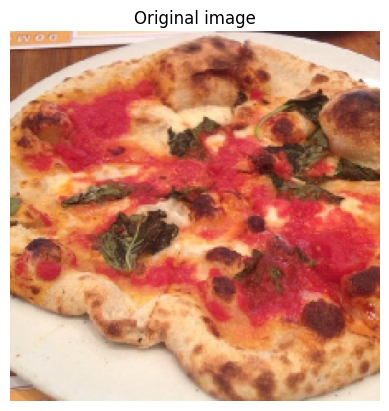

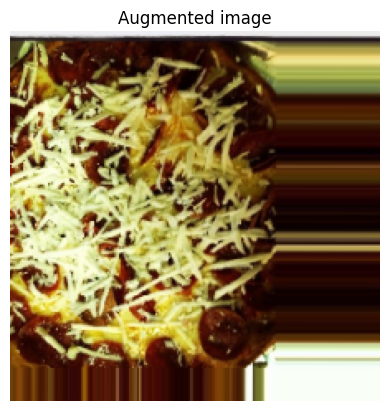

In [66]:
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [73]:
from tensorflow.python.ops.gen_nn_ops import MaxPool
# Create CNN model with augmented dataset

model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")]
)

model_6.compile(
    loss="binary_crossentropy",
    optimizer= Adam(),
    metrics=['accuracy']
)

history_6 = model_6.fit(train_data_augmented,
            epochs=5,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 457ms/step - loss: 0.7705 - accuracy: 0.5453 - val_loss: 0.6895 - val_accuracy: 0.5100
Epoch 2/5
47/47 [==============================] - 24s 504ms/step - loss: 0.6918 - accuracy: 0.5360 - val_loss: 0.6838 - val_accuracy: 0.6380
Epoch 3/5
47/47 [==============================] - 22s 459ms/step - loss: 0.6939 - accuracy: 0.5127 - val_loss: 0.6715 - val_accuracy: 0.7480
Epoch 4/5
47/47 [==============================] - 20s 431ms/step - loss: 0.6847 - accuracy: 0.5387 - val_loss: 0.6434 - val_accuracy: 0.6940
Epoch 5/5
47/47 [==============================] - 21s 448ms/step - loss: 0.7007 - accuracy: 0.5700 - val_loss: 0.6379 - val_accuracy: 0.7100


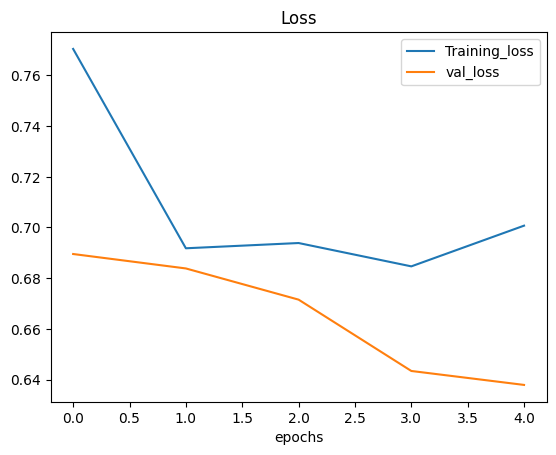

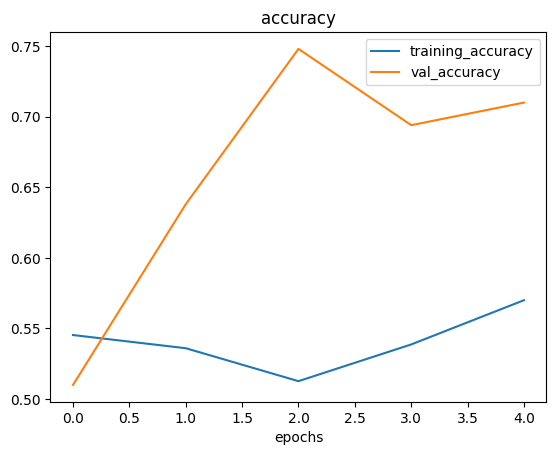

In [74]:
plot_loss_curves(history_6)

Now lets modify the shuffle paratemer to be True in the train data augmented

In [ ]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=True) # Change to True

In [78]:
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")]
)

model_7.compile(
    loss="binary_crossentropy",
    optimizer= Adam(),
    metrics=['accuracy']
)

history_7 = model_7.fit(train_data_augmented,
            epochs=5,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 544ms/step - loss: 0.6009 - accuracy: 0.6693 - val_loss: 0.4086 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 25s 530ms/step - loss: 0.5265 - accuracy: 0.7480 - val_loss: 0.3841 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 21s 458ms/step - loss: 0.4878 - accuracy: 0.7807 - val_loss: 0.3647 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 21s 456ms/step - loss: 0.4597 - accuracy: 0.7853 - val_loss: 0.3228 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 25s 524ms/step - loss: 0.4412 - accuracy: 0.8047 - val_loss: 0.3763 - val_accuracy: 0.8320


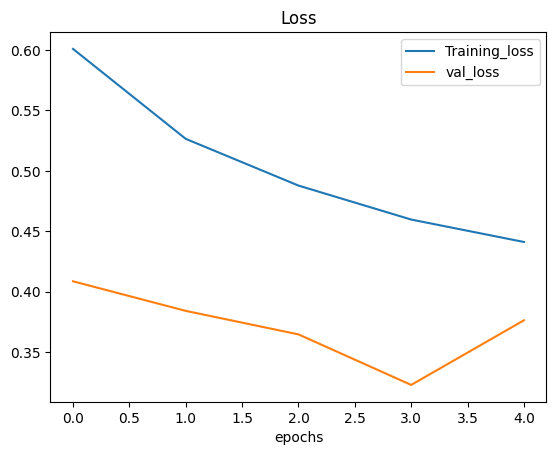

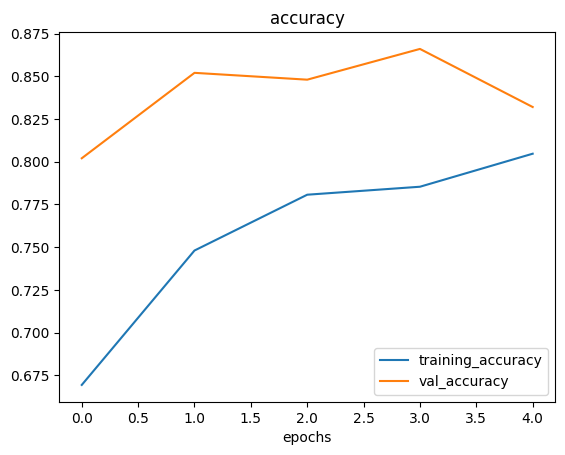

In [79]:
plot_loss_curves(history_7)

When suffuling training data, the model gets exposed to all different kinds of data and learn features across a wide array of images

### 7. Repeat until satisfied

Since we already beat our baseline, there are a few things we could try to continue to improve our model:
* Increase the number of model layers
* Increase the number of filters in each convulutional layers
* Train for longer
* Find an ideal learning rate
* Get more data
* Use transfer learning

### Increase the number of model layers

In [81]:
# Increase number of model layers
model_8 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")]
)

model_8.compile(
    loss="binary_crossentropy",
    optimizer= Adam(),
    metrics=['accuracy']
)

history_8 = model_8.fit(train_data_augmented,
            epochs=5,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 474ms/step - loss: 0.6889 - accuracy: 0.5347 - val_loss: 0.6409 - val_accuracy: 0.7240
Epoch 2/5
47/47 [==============================] - 22s 471ms/step - loss: 0.6245 - accuracy: 0.6660 - val_loss: 0.5124 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 21s 457ms/step - loss: 0.5582 - accuracy: 0.7347 - val_loss: 0.4785 - val_accuracy: 0.7860
Epoch 4/5
47/47 [==============================] - 22s 455ms/step - loss: 0.5256 - accuracy: 0.7587 - val_loss: 0.4367 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 22s 477ms/step - loss: 0.5216 - accuracy: 0.7593 - val_loss: 0.3840 - val_accuracy: 0.8180


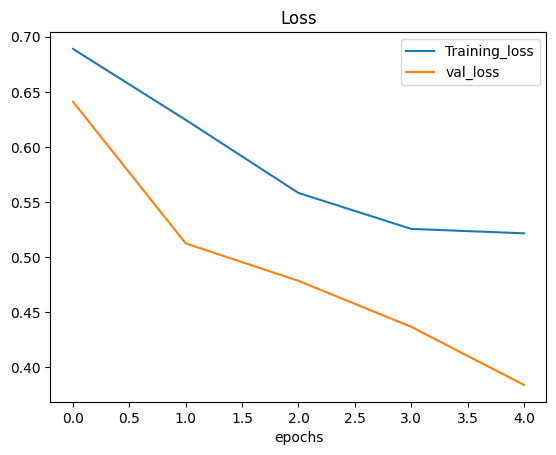

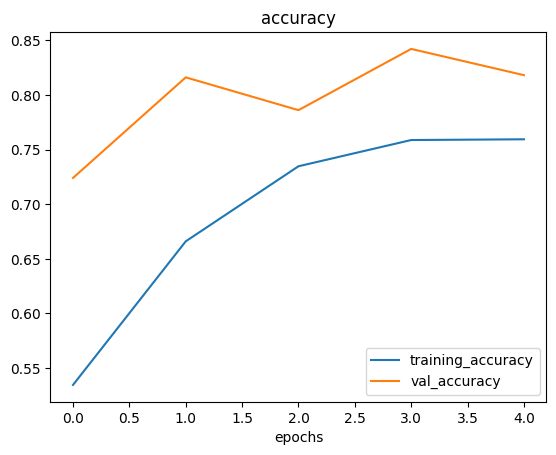

In [82]:
plot_loss_curves(history_8)

### Increase the number of filters in each convulutional layers

In [83]:
# Increase number of model layers
model_9 = Sequential([
    Conv2D(32, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(32, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(32, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(32, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")]
)

model_9.compile(
    loss="binary_crossentropy",
    optimizer= Adam(),
    metrics=['accuracy']
)

history_9 = model_9.fit(train_data_augmented,
            epochs=5,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 28s 503ms/step - loss: 0.6153 - accuracy: 0.6613 - val_loss: 0.3703 - val_accuracy: 0.8420
Epoch 2/5
47/47 [==============================] - 22s 472ms/step - loss: 0.5543 - accuracy: 0.7187 - val_loss: 0.3693 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 31s 673ms/step - loss: 0.5100 - accuracy: 0.7567 - val_loss: 0.3366 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 29s 599ms/step - loss: 0.5201 - accuracy: 0.7407 - val_loss: 0.3516 - val_accuracy: 0.8780
Epoch 5/5
47/47 [==============================] - 21s 448ms/step - loss: 0.4624 - accuracy: 0.7820 - val_loss: 0.3518 - val_accuracy: 0.8540


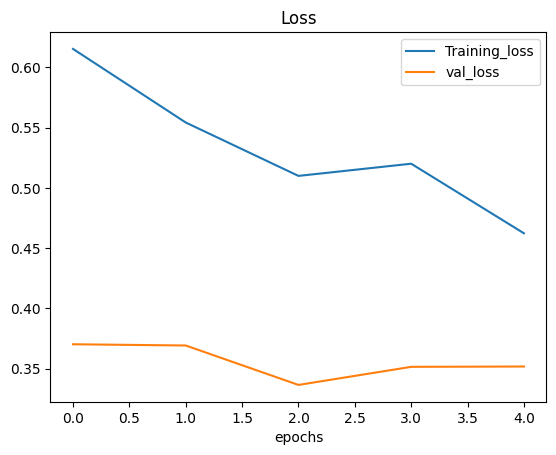

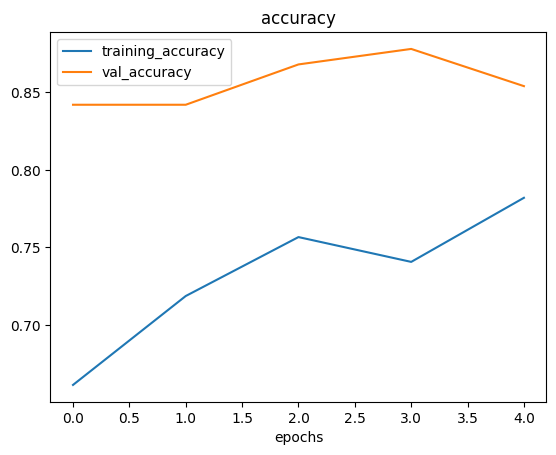

In [84]:
plot_loss_curves(history_9)

### Train for longer

In [85]:
# Increase number of model layers
model_10 = Sequential([
    Conv2D(32, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(32, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(32, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(32, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")]
)

model_10.compile(
    loss="binary_crossentropy",
    optimizer= Adam(),
    metrics=['accuracy']
)

history_10 = model_10.fit(train_data_augmented,
            epochs=10,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 23s 436ms/step - loss: 0.6508 - accuracy: 0.6067 - val_loss: 0.4319 - val_accuracy: 0.8380
Epoch 2/10
47/47 [==============================] - 23s 480ms/step - loss: 0.5532 - accuracy: 0.7380 - val_loss: 0.4565 - val_accuracy: 0.7820
Epoch 3/10
47/47 [==============================] - 23s 477ms/step - loss: 0.5062 - accuracy: 0.7687 - val_loss: 0.4436 - val_accuracy: 0.8020
Epoch 4/10
47/47 [==============================] - 23s 496ms/step - loss: 0.4913 - accuracy: 0.7667 - val_loss: 0.3815 - val_accuracy: 0.8600
Epoch 5/10
47/47 [==============================] - 23s 484ms/step - loss: 0.4606 - accuracy: 0.7960 - val_loss: 0.3390 - val_accuracy: 0.8600
Epoch 6/10
47/47 [==============================] - 21s 444ms/step - loss: 0.4594 - accuracy: 0.7880 - val_loss: 0.4560 - val_accuracy: 0.7840
Epoch 7/10
47/47 [==============================] - 22s 469ms/step - loss: 0.4299 - accuracy: 0.8033 - val_loss: 0.3172 - val_accuracy: 0.8740

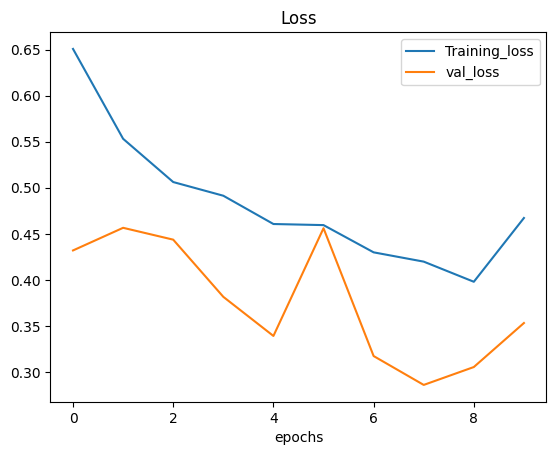

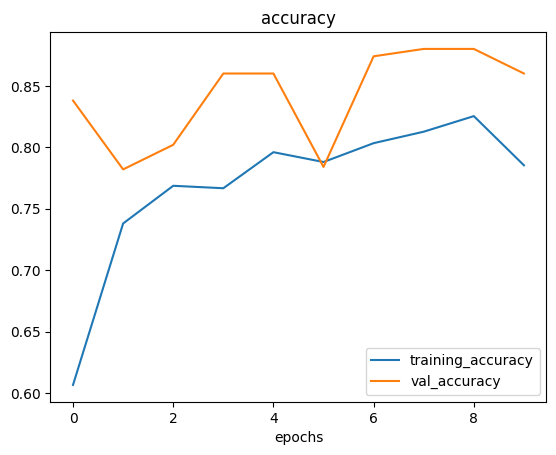

In [86]:
plot_loss_curves(history_10)

# Make a prediction with our trained model on ouw custom data

In [87]:
print(class_names)

['pizza' 'steak']


In [ ]:
# View our example image

--2023-10-18 03:42:59--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2023-10-18 03:42:59 (50.5 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



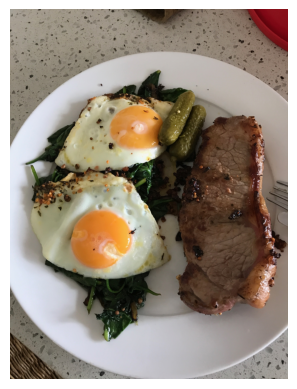

In [91]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [92]:
# Check the shape of our iamge
steak.shape

(4032, 3024, 3)

In [101]:
expanded_steak = tf.expand_dims(steak, axis=0)

When training a neural network, you want to make a prediction with it on your own custom data, its importan that your data is preprocessed into the same format as the data your model was trained on

In [117]:
# create a helper function to import an image and resize it to be able to use it in our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes to to
  (img_shape, img_shape, color_channels)
  """
  # read iamge
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor
  img = tf.image.decode_image(img)

  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])

  # Rescale image (get values between 0 and 1)
  img = img/255.

  # Expand dim
  img = tf.expand_dims(img, axis=0)

  return img

In [118]:
# Load in and preprocess our custome image
steak = load_and_prep_image("/content/03-steak.jpeg", 224)
steak.shape

TensorShape([1, 224, 224, 3])

In [120]:
model_10.predict(steak)

1/1 [==============================] - 0s 19ms/step


array([[0.8942687]], dtype=float32)